# Import Data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly_express as px

In [20]:
data = pd.read_csv('../data/raw_data.csv',encoding="ISO-8859-1")
data.head()

C:\Users\onero\AppData\Local\Temp\ipykernel_7084\468009671.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

# Clean Data

In [22]:
data.drop(['stn_code', 'sampling_date', 'agency','location_monitoring_station','pm2_5'], axis=1, inplace=True)
data.reset_index(drop=True)

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data["type"].unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [24]:
cleaning_map = {
    'Residential, Rural and other Areas': 'Residential',
    'Residential and others': 'Residential',
    'RIRUO': 'Residential',
    'Industrial Area': 'Industrial',
    'Industrial Areas': 'Industrial',
    'Sensitive Area': 'Sensitive',
    'Sensitive Areas': 'Sensitive'
}

data['type'] = data['type'].replace(cleaning_map)

print(data)

                              state   location         type   so2   no2  \
0                    Andhra Pradesh  Hyderabad  Residential   4.8  17.4   
1                    Andhra Pradesh  Hyderabad   Industrial   3.1   7.0   
2                    Andhra Pradesh  Hyderabad  Residential   6.2  28.5   
3                    Andhra Pradesh  Hyderabad  Residential   6.3  14.7   
4                    Andhra Pradesh  Hyderabad   Industrial   4.7   7.5   
...                             ...        ...          ...   ...   ...   
435737                  West Bengal   ULUBERIA  Residential  22.0  50.0   
435738                  West Bengal   ULUBERIA  Residential  20.0  46.0   
435739  andaman-and-nicobar-islands        NaN          NaN   NaN   NaN   
435740                  Lakshadweep        NaN          NaN   NaN   NaN   
435741                      Tripura        NaN          NaN   NaN   NaN   

         rspm  spm        date  
0         NaN  NaN  1990-02-01  
1         NaN  NaN  1990-02-01  


In [25]:
data.drop(index=[435739,435740,435741],inplace=True)

In [26]:
columns_to_fill = ['so2', 'no2','rspm','spm','pm2_5']  # Specify the columns you want to fill

# Fill NaN values in the specified columns with their respective means
# for column in columns_to_fill:
#     data[column] = data[column].fillna(data[column].mean())
print(data.count())
print("-----------------------")
print("Missing value count")
print(data.isnull().sum())

null_date = data[data['date'].isnull()]
print(null_date)
data.drop(index=[148537,245191,245355,284318],inplace=True)


state       435739
location    435739
type        430349
so2         401096
no2         419509
rspm        395520
spm         198355
date        435735
dtype: int64
-----------------------
Missing value count
state            0
location         0
type          5390
so2          34643
no2          16230
rspm         40219
spm         237384
date             4
dtype: int64
              state    location         type   so2   no2   rspm  spm date
148537    Karnataka   Bangalore    Sensitive   6.0   8.0   25.0  NaN  NaN
245191  Maharashtra  Chandrapur   Industrial  11.0  25.0   80.0  NaN  NaN
245355  Maharashtra  Chandrapur  Residential  12.0  41.0  104.0  NaN  NaN
284318       Odisha    Balasore   Industrial   9.0  14.0  105.0  NaN  NaN


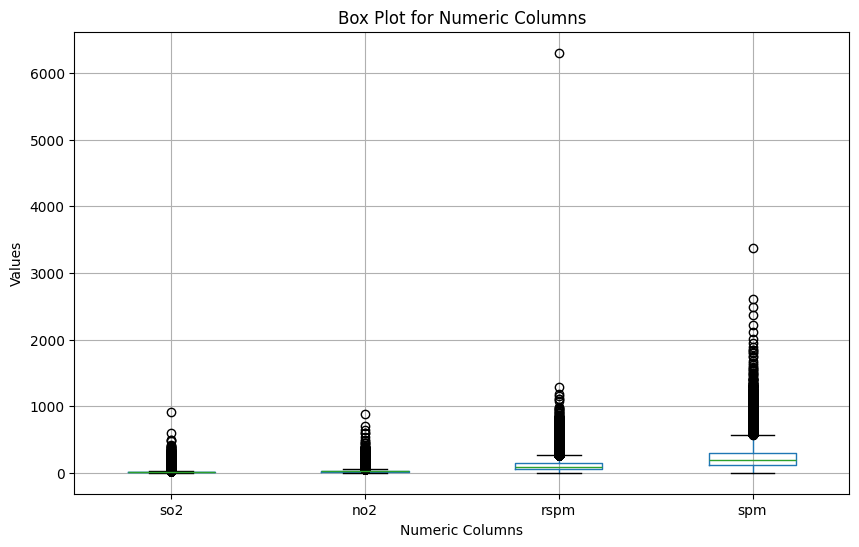

In [27]:
df = pd.DataFrame(data)

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Reshape the data for Plotly
melted_df = numeric_columns.melt(var_name='Metric', value_name='Value')

# Create the box plot using matplotlib
plt.figure(figsize=(10, 6))
numeric_columns.boxplot()

# Customize the plot
plt.title('Box Plot for Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')

# Display the plot
plt.show()

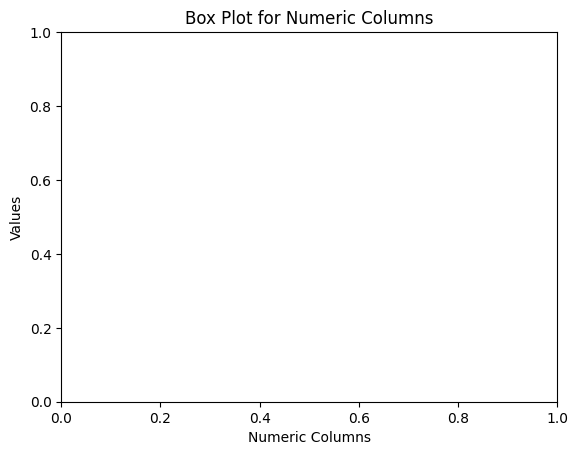

In [28]:

# Customize the plot
plt.title('Box Plot for Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')

# Display the plot
plt.show()

In [29]:
def outlier_clean(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # กำหนดช่วงที่ไม่มี Outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier = df[(df <= lower_bound) | (df >= upper_bound)]
    print(f"Outlier count :{outlier.count()}")
    # ลบ Outliers
    return df[(df >= lower_bound) & (df <= upper_bound)]

In [30]:
# mean_value = np.mean(data['so2'])
# median_value = np.median(data['so2'])
# mode_value = st.mode(data['so2'])

# print(mode_value)

# def data_tendency(data):
    
#     mean_value = np.mean(data)
#     median_value = np.median(data)
#     mode_value = st.mode(data).mode
    
    # คำนวณ Skewness (ค่าการเบ้)
    # skewness = st.skew(data)
    
    # print(f"Mean: {mean_value:.2f}")
    # print(f"Median: {median_value}")
    # print(f"Mode: {mode_value}")
    # print(f"Skewness: {skewness:.2f}")
    
    # # กฎในการเลือก
    # if abs(skewness) < 0.5:
    #     print("ข้อมูลมีการกระจายแบบสมมาตร: ควรใช้ Mean")
    # elif skewness > 0.5:
    #     print("ข้อมูลเบ้ขวา: ควรใช้ Median")
    # elif skewness < -0.5:
    #     print("ข้อมูลเบ้ซ้าย: ควรใช้ Median")
    # else:
    #     print("หากข้อมูลเป็นหมวดหมู่หรือมีค่าซ้ำมาก ควรพิจารณาใช้ Mode")
    
columns_to_fill = ['so2', 'no2','rspm','spm']  # Specify the columns you want to fill

# Fill NaN values in the specified columns with their respective means
for column in columns_to_fill:
    print(column)
    outlier_clean(data[column])
    nan_data = data[column].dropna()
    # data_tendency(nan_data)
    print("-------------------------------------------------")

so2
Outlier count :23196
-------------------------------------------------
no2
Outlier count :19094
-------------------------------------------------
rspm
Outlier count :13905
-------------------------------------------------
spm
Outlier count :5326
-------------------------------------------------


In [31]:
columns_to_fill = ['so2', 'no2','rspm','spm']
for column in columns_to_fill:
    data[column].fillna(0,inplace=True)


data["type"].fillna(data["type"].mode()[0], inplace=True)
data.head()
data.reset_index(drop=True)

C:\Users\onero\AppData\Local\Temp\ipykernel_7084\1914087342.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\onero\AppData\Local\Temp\ipykernel_7084\1914087342.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,0.0,0.0,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,0.0,0.0,1990-02-01
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,0.0,0.0,1990-02-01
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,0.0,0.0,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,0.0,0.0,1990-03-01
...,...,...,...,...,...,...,...,...
435730,West Bengal,ULUBERIA,Residential,20.0,44.0,148.0,0.0,2015-12-15
435731,West Bengal,ULUBERIA,Residential,17.0,44.0,131.0,0.0,2015-12-18
435732,West Bengal,ULUBERIA,Residential,18.0,45.0,140.0,0.0,2015-12-21
435733,West Bengal,ULUBERIA,Residential,22.0,50.0,143.0,0.0,2015-12-24


In [32]:
data[data.duplicated()]

,state,location,type,so2,no2,rspm,spm,date
236,Andhra Pradesh,Hyderabad,Residential,1.9,4.5,0.0,0.0,1994-09-01
237,Andhra Pradesh,Hyderabad,Residential,0.9,2.6,0.0,0.0,1994-09-01
238,Andhra Pradesh,Hyderabad,Residential,1.3,6.7,0.0,0.0,1994-09-01
353,Andhra Pradesh,Vishakhapatnam,Residential,24.2,47.0,0.0,259.0,1996-02-01
2506,Andhra Pradesh,Hyderabad,Residential,4.9,32.0,88.0,243.0,2005-07-01
...,...,...,...,...,...,...,...,...
419070,West Bengal,Haldia,Industrial,12.0,42.9,162.0,228.0,2007-01-15
419071,West Bengal,Haldia,Industrial,12.9,48.0,186.0,291.0,2007-01-18
419072,West Bengal,Haldia,Industrial,10.9,53.4,105.0,234.0,2007-01-21
419073,West Bengal,Haldia,Industrial,12.4,59.7,160.0,276.0,2007-01-25


In [33]:
data = data.drop_duplicates()
# data[data.duplicated()]

In [34]:
data.to_csv("../data/clean_data.csv",index=False)